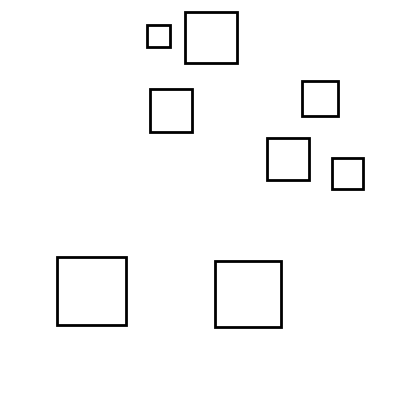

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random


def create_random_non_touching_squares(
    N, min_size=0.05, max_size=0.2, border_thickness=0.02
):
    # Create a new figure
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    # List to store the positions and sizes of squares
    squares = []

    # Generate squares
    for _ in range(N):
        while True:
            # Generate random size between min_size and max_size
            size = random.uniform(min_size, max_size)
            # Generate random position ensuring the square stays within the plot
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            current_square = (x, y, size)

            # Check if the new square overlaps with any existing square's borders
            overlap = False
            for px, py, psize in squares:
                if not (
                    x + size + border_thickness < px
                    or x > px + psize + border_thickness
                    or y + size + border_thickness < py
                    or y > py + psize + border_thickness
                ):
                    overlap = True
                    break
            if not overlap:
                squares.append(current_square)
                break

        # Create and add the square patch
        square = patches.Rectangle(
            (x, y),
            size,
            size,
            linewidth=2,
            edgecolor="black",
            facecolor="none",
        )
        ax.add_patch(square)

    # Set the limits of the plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove the axis border
    ax.axis("off")

    # Display the plot
    plt.show()


# Example usage with N squares
create_random_non_touching_squares(8)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def compute_squares(center, size, depth, reduction_factor, padding, squares_list):
    if depth == 0:
        return

    # Store the current square's details
    squares_list.append({"center": center, "size": size})

    # Calculate the size of the next square, reduced by the reduction factor and padding
    new_size = size * reduction_factor - padding

    # Ensure new_size is positive
    if new_size <= 0:
        return

    # Generate random offsets within bounds to ensure no overlap, adjusted for padding
    max_offset = (size - new_size - padding) / 2
    offset_x = random.uniform(-max_offset, max_offset)
    offset_y = random.uniform(-max_offset, max_offset)

    # Calculate the new center
    new_center = (center[0] + offset_x, center[1] + offset_y)

    # Recursive call to compute further nested squares
    compute_squares(
        new_center, new_size, depth - 1, reduction_factor, padding, squares_list
    )


def plot_squares(ax, squares_list, line_thickness):
    for square in squares_list:
        center = square["center"]
        size = square["size"]
        # Create and add a square patch to the axes
        square_patch = patches.Rectangle(
            (center[0] - size / 2, center[1] - size / 2),
            size,
            size,
            fill=False,
            linewidth=line_thickness,
        )
        ax.add_patch(square_patch)


def generate_and_save_images(num_images, depths, save_path):
    os.makedirs(save_path, exist_ok=True)
    image_details = []

    for i in range(num_images):
        depth = random.choice(depths)
        center = (random.uniform(-5, 5), random.uniform(-5, 5))
        initial_size = random.uniform(8, 12)
        reduction_factor = 0.75
        padding = 0.75

        # Compute all squares first
        squares_list = []
        compute_squares(
            center, initial_size, depth, reduction_factor, padding, squares_list
        )

        # Plot and save images with different line thicknesses
        for line_thickness in [2, 3, 4]:
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.set_aspect("equal")
            ax.set_xlim(-15, 15)
            ax.set_ylim(-15, 15)
            ax.axis("off")

            plot_squares(ax, squares_list, line_thickness)

            image_name = f"nested_squares_{depth}_{i+1}_thickness_{line_thickness}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            image_details.append(
                {
                    "image_name": image_name,
                    "depth": depth,
                    "center": center,
                    "initial_size": initial_size,
                    "reduction_factor": reduction_factor,
                    "line_thickness": line_thickness,
                    "padding": padding,
                    "squares": squares_list,
                }
            )

    # Save details to a JSON file
    with open(os.path.join(save_path, "image_details.json"), "w") as f:
        json.dump(image_details, f, indent=4)


# Example usage: generate 50 images with depths ranging from 2 to 5
generate_and_save_images(50, [2, 3, 4, 5], "saved_images")